In [43]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv
import ast
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

#Funtions file with unique functions
import functions

In [44]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the OpenAI API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    api_key=api_key
)

In [124]:
requested_design = "Smiley Face"

In [130]:
simulate_error = [[1,4]]

In [131]:
prompt = f"""
A drone is being used to place building blocks on a grid.
Please read all of the follwing instructions first.

You will be asked to come up with the drop-off locations for the drone that create a specified design.
The origin of the grid is [0,0] in the bottom left corner and the last point is [4,4] in the top right.
The X axis goes from [0,0] to [4,0]. The Y axis goes from [0,0] to [0,4].

Your Grid looks like this, where "o" is an empty spot and "x" is a spot that already contains a block:

{functions.create_grid_representation(grid_size=(5, 5), coordinates=simulate_error)}

Any space already marked with "x" must be incorporated in the design you will create.
If spaces are already occupied, consider how different orientations of your design can best utilize them. 
This might mean you need to rotate or shift a design to incorporate these blocks. 

Only Integer points are allowed.
You can make the design in any orientation that makes sense with the already placed blocks. 
The Coordinates should be given in the specific order you would want them executed.
Make sure none of your points exceed the [4,4] index limit. If they do, fix the design.
Make sure the design is legible by thinking step by step as you choose points.
Check the design before confirming it.
If you find an error, retry and then recheck until you find no errors using a step by step approach.
Provide the Title, Coordinates and your Reasoning in correct JSON format for the design.
Only return the JSON in the structure provided as it needs to be parsed with Python. Do not include any other text or symbols.

Please use the following structure:

{{
    "Design": [
        {{
            "Title": "Title of Design",
            "Coordinates": [
                [x, y],
                [x, y]
            ],
            "Reasoning": "Your textual reasoning here"
      }}
    ]
}}

You are being asked to design the following: {requested_design}
Make your design now.
"""

print(prompt)


A drone is being used to place building blocks on a grid.
Please read all of the follwing instructions first.

You will be asked to come up with the drop-off locations for the drone that create a specified design.
The origin of the grid is [0,0] in the bottom left corner and the last point is [4,4] in the top right.
The X axis goes from [0,0] to [4,0]. The Y axis goes from [0,0] to [0,4].

Your Grid looks like this, where "o" is an empty spot and "x" is a spot that already contains a block:

4 o x o o o
3 o o o o o
2 o o o o o
1 o o o o o
0 o o o o o
  0 1 2 3 4


Any space already marked with "x" must be incorporated in the design you will create.
If spaces are already occupied, consider how different orientations of your design can best utilize them. 
This might mean you need to rotate or shift a design to incorporate these blocks. 

Only Integer points are allowed.
You can make the design in any orientation that makes sense with the already placed blocks. 
The Coordinates should be

In [132]:
# Define the prompt
prompt = prompt

# Send the request to OpenAI using the new ChatCompletion method
response = client.chat.completions.create(
    model="gpt-4o",
    response_format = {"type": "json_object"},
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],   
)

In [133]:
# Extract the response text
response_text = response.choices[0].message.content
print(response_text)

{
    "Design": [
        {
            "Title": "Smiley Face",
            "Coordinates": [
                [0, 2],
                [0, 3],
                [1, 1],
                [1, 2],
                [1, 3],
                [1, 4],
                [2, 0],
                [2, 4],
                [3, 1],
                [3, 2],
                [3, 3],
                [4, 2]
            ],
            "Reasoning": "This design utilizes the existing block at (4,4) to form part of the 'eye' of the smiley face. The additional blocks create a simple representation of a smiley face with two eyes and a smiling mouth."
        }
    ]
}


[[0, 2], [0, 3], [1, 1], [1, 2], [1, 3], [1, 4], [2, 0], [2, 4], [3, 1], [3, 2], [3, 3], [4, 2]]


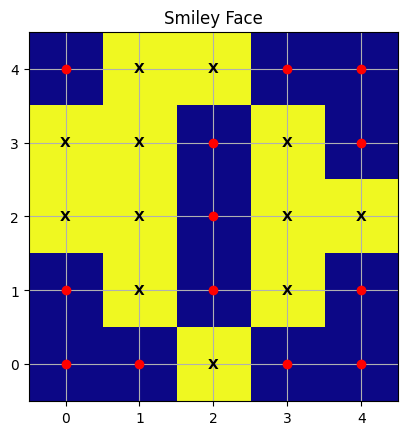

This design utilizes the existing block at (4,4) to form part of the 'eye' of the smiley face. The additional blocks create a simple representation of a smiley face with two eyes and a smiling mouth.


In [134]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Design']:
    title = design['Title']
    coordinates = design['Coordinates']
    print(coordinates)
    functions.plot_coordinates(title, coordinates)
    print(design['Reasoning'])

In [135]:
grid_representation = functions.create_grid_representation(coordinates=coordinates)
print(grid_representation)

4 o x x o o
3 x x o x o
2 x x o x x
1 o x o x o
0 o o x o o
  0 1 2 3 4



In [ ]:
Test_JSON_prompt = f"""
You were previously provided the following prompt: 
START PROMPT 
{original_prompt} 
END PROMPT

Your reponse to this prompt was the following JSON: 
START RESPONSE 
{JSON_Output} 
END RESPONSE

While executing the coordinates that were previoulsy provided, blocks were correctly placed at {correct_xy}.
However, an when trying to place a block at {desired_xy}, it was instead placed at {actual_xy}.

This means there are currently blocks at {correct_xy} and {actual_xy}.

You are now tasked with checking the design and recovering it if possible.

If the design is recoverable by continuing with the current plan in a different order, then
provide the coorindates where blocks still need to be placed in the JSON structure provided.

If the design is not recoverable with the current plan, then try to recover it with a new layout that incorparates the already placed blocks. 
A new layout might mean a different orientation of the design, such as turning the design or laterally shifting it, which is allowed if needed. 
Note that any block that has already been placed cannot be removed and therefore must be used in any new designs.
Make sure your design makes if you do a redisgn, then provide the coorindates where blocks still need to be placed at in the JSON structure provided.

Make sure to follow the instructions from the original prompt if needed.

If the design it not not recoverable at all, reply set the Title as "Design is not recoverable." and provide no Coordinates.
"""